In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

<p style="color:blue;">
First line ensures that the interpreter will use the first installed version on environment's $PATH. its called shebang and in unix it marks as executable. Second line comment is processed as an encoding declaration

# Deep Neural Networks 
## Session 01

## Implementation of MP Neuron.
<div>
<img src='../../images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>
    </div>

## 1. Import Statements
Import all the libraries.

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

%matplotlib inline

## 2. Setup Global Parameters

In [3]:
inpDir = '../input'

outDir = '../output'

RANDOM_STATE = 24 

np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# Parameters for plotting
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
         }

plt.rcParams.update(params)

## 3. Generate Data Set

<div class="alert alert-block alert-info" style="font-family: Arial; font-size:1.1em;">
Use Sklearn's dataset generator load_breast_cancer.
<div>

In [4]:
dataset = datasets.load_breast_cancer()

X = dataset.data
y = dataset.target

print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
# Split X and y in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, # proportion to include in the test split
                                                    stratify = y,  # split in a stratified fashion, using this as the class labels
                                                    random_state=RANDOM_STATE) # set the random state
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(455, 30) (455,) (114, 30) (114,)


# Over to MP Neurons
<img src='images/dnn_nb_s01_fig_1.png' width='350' />

<div class="alert alert-block alert-info" style="font-family: Arial; font-size:1.1em;">
    <h3>Assumptions:</h3>
    <ol>
<li>The structure of the net does not change with time.</li>
<li>The activity of the neuron is an "all-or-none" process.</li>
<li>The activity of any inhibitory synapse absolutely prevents excitation of the neuron at that time.</li>
</ol>

<p> 
    MP Neuron only takes binary inputs so we will convert input and output data to [0,1]
    </p>
    <h3>pandas.cut</h3>

> pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)
    
Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.<br>
    It takes min and max values and marks all values less than half in one bin and those more than half in another bin.   
    </div>

In [6]:
pd.cut(np.array([1, 7, 5, 4, 2, 6, 9, 9, 9, 9]),2, labels=[1,0])

[1, 0, 1, 1, 1, 0, 0, 0, 0, 0]
Categories (2, int64): [1 < 0]

In [7]:
# Easy to work with DataFrames. converting X_train to a DataFrame
train_df = pd.DataFrame(X_train, 
                        columns = dataset.feature_names) # Naming columns with feature names

train_df.head() # Let's see first 5 rows

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,15.610,19.38,100.0,758.6,0.07840,0.05616,0.04209,0.02847,0.1547,0.05443,...,17.91,31.67,115.90,988.6,0.1084,0.1807,0.22600,0.08568,0.2683,0.06829
1,9.742,15.67,61.5,289.9,0.09037,0.04689,0.01103,0.01407,0.2081,0.06312,...,10.75,20.88,68.09,355.2,0.1467,0.0937,0.04043,0.05159,0.2841,0.08175
2,20.310,27.06,132.9,1288.0,0.10000,0.10880,0.15190,0.09333,0.1814,0.05572,...,24.33,39.16,162.30,1844.0,0.1522,0.2945,0.37880,0.16970,0.3151,0.07999
3,13.510,18.89,88.1,558.1,0.10590,0.11470,0.08580,0.05381,0.1806,0.06079,...,14.80,27.20,97.33,675.2,0.1428,0.2570,0.34380,0.14530,0.2666,0.07686
4,10.710,20.39,69.5,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,0.06862,...,11.69,25.21,76.51,410.4,0.1335,0.2550,0.25340,0.08600,0.2605,0.08701


In [8]:
cutoff = (train_df['mean radius'].min() + train_df['mean radius'].max())/2
cutoff

17.5455

In [9]:
train_df[train_df['mean radius'] < cutoff].shape

(374, 30)

In [10]:
cutoff = (train_df['mean compactness'].min() + train_df['mean compactness'].max())/2
cutoff

0.15304

In [11]:
train_df[train_df['mean compactness'] < cutoff].shape

(377, 30)

<div class = 'alert alert-block alert-warning'>
    For this model to work, it is important that we label [1,0] and not [0,1]
    </div>

In [12]:
#Converting data into binary data and segment and sort data values into bins.
X_bin_train = train_df.apply(pd.cut, bins = 2, labels = [1,0])
X_bin_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,1,1,0,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [13]:
# Describe will help us know count, unique, top and frequency
X_bin_train.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,455,455,455,455,455,455,455,455,455,455,...,455,455,455,455,455,455,455,455,455,455
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
freq,374,404,377,433,367,377,416,411,384,417,...,369,342,374,418,342,428,420,306,401,446


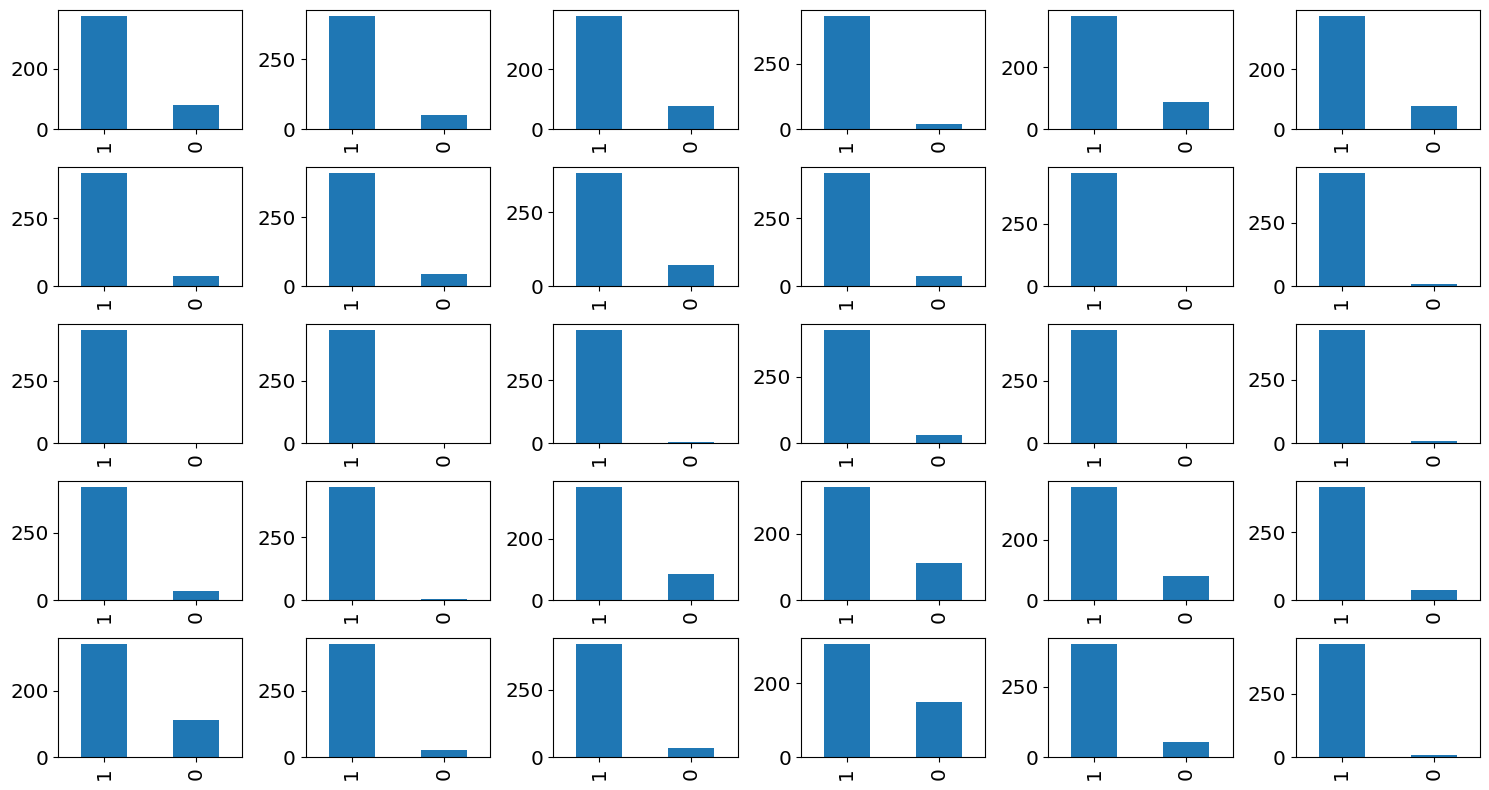

In [14]:
# Plot Training data

fig, axes = plt.subplots(5,6) # 5 x 6 = 30 columns

axes = axes.ravel() # convert 2d Array to single dimension

# Iterate all columns and plot individually
for i, col in enumerate(X_bin_train.columns):
    
    X_bin_train[col].value_counts().plot(ax=axes[i], kind='bar');

plt.tight_layout()

In [15]:
# put test data also in the bins
X_bin_test = pd.DataFrame(X_test, columns = dataset.feature_names).apply(pd.cut, bins = 2, labels = [1,0])

In [16]:
X_bin_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,1,1,0,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [17]:
X_bin_train.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
450,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
451,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
452,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
453,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
454,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [18]:
X_bin_train['total'] = X_bin_train.sum(axis=1) # create a column with sums

X_bin_train['target'] = y_train # target column from y_train

X_bin_train.sort_values('total', inplace = True) # sort the values as per total

X_bin_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
163,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,1,1,12.0,0
357,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,12.0,0
292,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,12.0,0
196,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,13.0,0
391,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,14.0,0


In [19]:
# Reapeat the above steps with test dataset
X_bin_test['total'] = X_bin_test.sum(axis=1)
X_bin_test['target'] = y_test
X_bin_test.sort_values('total', inplace = True)
X_bin_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
35,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,11.0,0
66,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,11.0,0
0,1,0,1,1,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,12.0,0
52,1,0,1,1,0,0,0,0,0,0,...,1,1,0,0,0,0,1,1,14.0,0
77,0,0,0,1,1,0,0,0,0,0,...,1,1,1,1,1,0,1,1,14.0,0


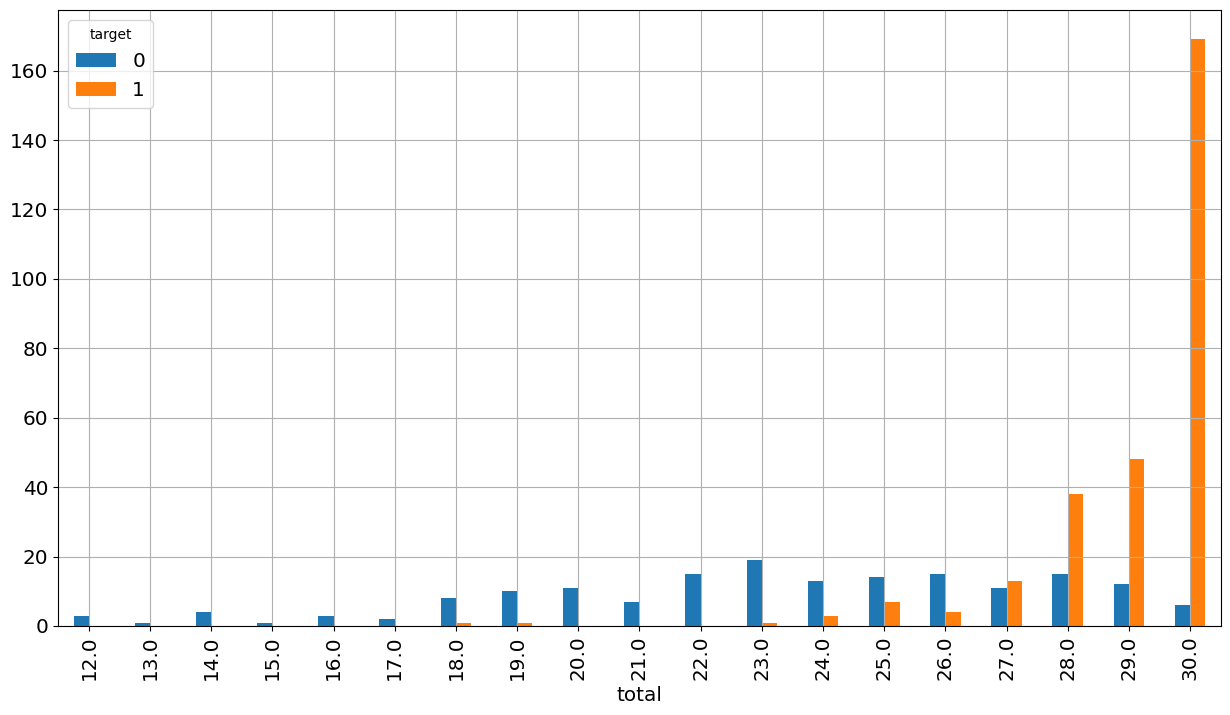

In [20]:
# plot Count of totals in the train set
tmp_df = X_bin_train.groupby(['total', 'target']).agg({'target': 'count'}) # Create a tmp dataframe

tmp_df.columns = ['count'] # rename column

tmp_df.reset_index(inplace = True) # reset index helps

tmp_df.pivot(index='total', columns='target', values='count').plot(kind = 'bar') # create a pivot and plot

plt.grid(); # some beautification

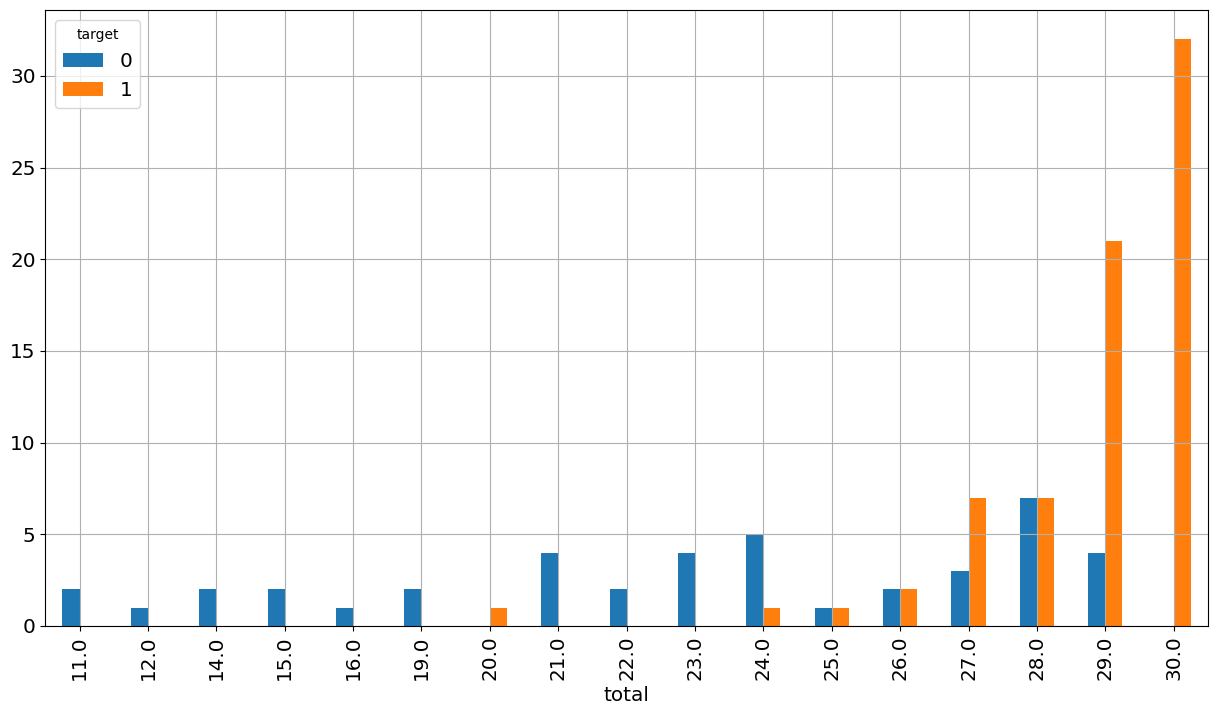

In [21]:
# repeat for test set

tmp_df = X_bin_test.groupby(['total', 'target']).agg({'target': 'count'})

tmp_df.columns = ['count']

tmp_df.reset_index(inplace = True)

tmp_df.pivot(index='total', columns='target', values='count').plot(kind = 'bar')

plt.grid();

In [22]:
# Calculate accuracy
accuracy = {}

# loop over the rows

for b in range(X_bin_train.shape[1]):
    
    X_bin_train['y_pred'] = X_bin_train['total'] >= b # make prediction based on total
    
    accuracy[b] = accuracy_score(X_bin_train['y_pred'], X_bin_train['target']) # calculate accuracy
    
best_b = max(accuracy, key = accuracy.get) # find best accuracy

print('Optimal value of b is', best_b)

print('Highest accuracy is: {0:4.2f} %'.format(accuracy[best_b] *100))

Optimal value of b is 27
Highest accuracy is: 86.59 %


In [23]:
# Using best b calculate accuracy on test set

X_bin_test['y_pred'] = X_bin_test['total'] >= best_b

test_accuracy = accuracy_score(X_bin_test['y_pred'], X_bin_test['target'])

print ('Accuracy of testing is: {0:4.2f} %'.format(test_accuracy*100))

Accuracy of testing is: 83.33 %


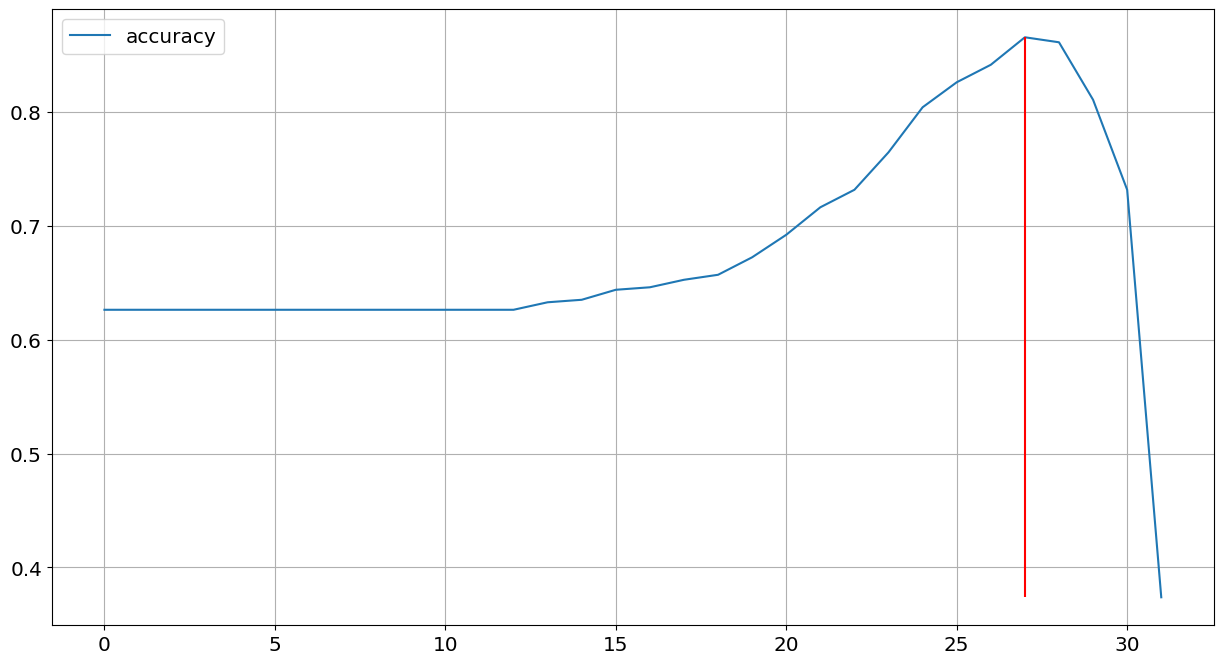

In [24]:
# plot results
ax = pd.DataFrame([accuracy], index = ['accuracy']).T.plot()
_ = ax.vlines( x=best_b, ymin=min(accuracy.values()), ymax=accuracy[best_b], colors='r')
plt.grid()

# Exercise 1: 
Try with bin labels as [0,1]

In [25]:
#Converting data into binary data ans segment and sort data values into bins.
X_bin_train = train_df.apply(pd.cut, bins = 2, labels = [0,1])
X_bin_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_bin_train['total'] = X_bin_train.sum(axis=1) # create a column with sums

X_bin_train['target'] = y_train # Target column from y_train

X_bin_train.sort_values('total', inplace = True) # sort the values as per total

X_bin_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1
305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1
130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1
302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1
134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1


In [27]:
accuracy = {}

for b in range(X_bin_train.shape[1]):
    
    X_bin_train['y_pred'] = X_bin_train['total'] < b
    
    accuracy[b] = accuracy_score(X_bin_train['y_pred'], X_bin_train['target'])
    
best_b = max(accuracy, key = accuracy.get)

print('Optimal value of b is', best_b)

print('Highest accuracy is: {0:4.2f} %'.format(accuracy[best_b] *100))

Optimal value of b is 4
Highest accuracy is: 86.59 %


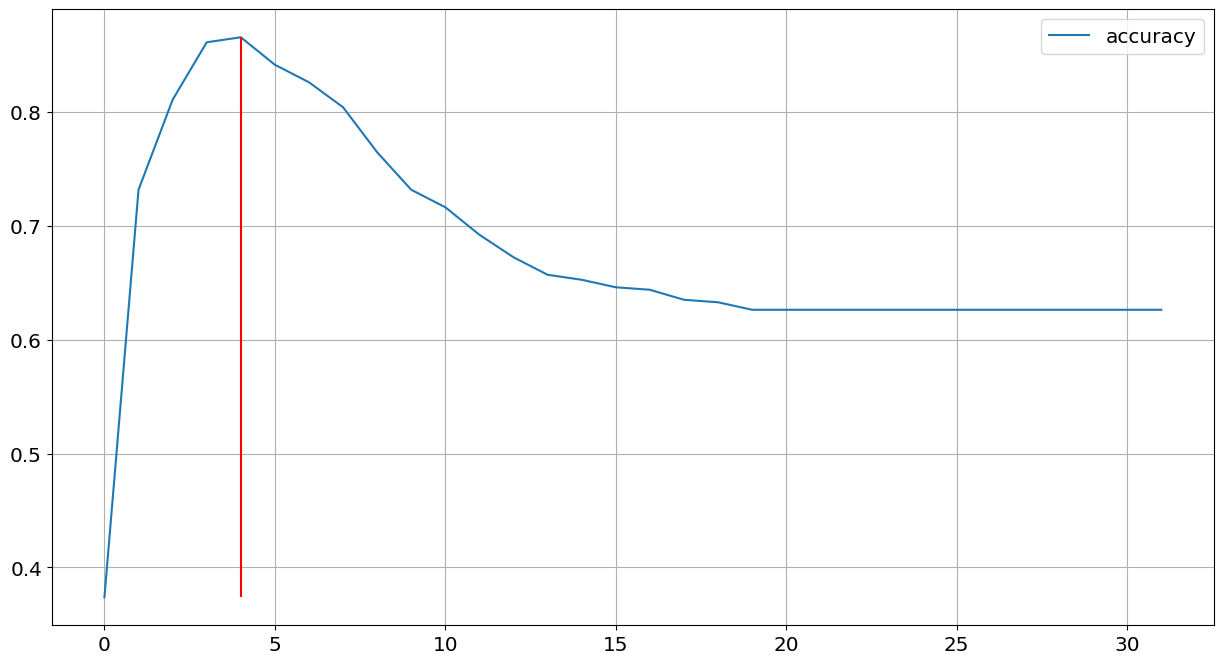

In [28]:
ax = pd.DataFrame([accuracy], index = ['accuracy']).T.plot()
_ = ax.vlines( x=best_b, ymin=min(accuracy.values()), ymax=accuracy[best_b], colors='r')
plt.grid()